## Sheriden 6 Local Enhanced Management Area Model (SD-6 Model)
## Background of the Sheriden 6 Local Enhanced Management Area (SD-6 LEMA)

The SD-6 LEMA, launched in 2012, is a grassroots groundwater management initiative under the LEMA program within western Kansas’s High Plains Aquifer region. With the objective of curtailing groundwater consumption by capping the water rights at 55 inches per unit area over a five-year period, SD-6 LEMA has completed two full cylces, first from 2013 to 2017 and subsequently from 2018 to 2022. Water use diminished by 33.6% in the first period and by 36.8% in the second. The upcoming section provides an overview of how PyCHAMP can model the complex interactions between human activities and water systems, employing SD-6 LEMA case study as an illustrative example. The article referenced has a detailed description of the background and the study area.

Lin, C. Y., Alegria, M. E. O., Dhakal, S., Zipper, S., & Marston, L. (2024). PyCHAMP: A Crop-Hydrological-Agent Modeling Platform for Groundwater Management. Environmental Modelling & Software, 106187. (https://doi.org/10.1016/j.envsoft.2024.106187)

## Setting up a complete simulation of the SD-6 model

### Input Data and Model Structure

SD-6 model, which is based on Mesa 2.1.1 framework, is set up utilizing aquifer, field, well, finance, and behavior classes described within this documentation. The required input data to initiate and run an SD-6 LEMA simulation with each farmer managing a single well and field are given in the table below. For more details, visit: https://dises-pychamp.readthedocs.io/en/latest/example_SD6.html#input-data-and-model-structure

## Execution Steps

### 1. Import the SD-6 model from PyCHAMP.

In [1]:
from py_champ.models.sd6_model import SD6Model

### 2. Import necessary libraries and load a pickle file containing all the input dictionaries for different classes, along with pre-calculated available precipitation for each crop, based on its growing season. 
The pickle file can be downloaded from https://github.com/philip928lin/PyCHAMP/tree/main/examples/SD6%20Model. For a detailed understanding of creating your own input file, refer to Creating simple input dictionaries to set up and run an SD-6 model simulation and Creating advanced input dictionaries to set up and run an SD-6 Model.

In [2]:
import dill
import os
import pandas as pd

# set up a working directory (wd) and load the inputs
wd = r"C:\Users\fkk17001\Documents\github\DISES_PyCHAMP_fahad\examples\SD6 Model"
with open(os.path.join(wd, "Inputs_SD6.pkl"), "rb") as f:
    (aquifers_dict, fields_dict, wells_dict, finances_dict, behaviors_dict,
     prec_aw_step, crop_price_step, shared_config) = dill.load(f)

### 3. Load the required observed data to validate model’s ability to simulate real world human water interaction. 
The csv file can be accessed at https://github.com/philip928lin/PyCHAMP/tree/main/examples/SD6%20Model.

In [10]:
data = pd.read_csv(os.path.join(wd, "Data_SD6.csv"), index_col=["year"])


### 4. Load other necessary inputs.

In [4]:
# crop type for the simulation
crop_options = ["corn", "sorghum", "soybeans", "wheat", "fallow"]

# type of irrigation technology available
tech_options = ["center pivot LEPA"]

# number of splits for each field
area_split = 1

# seed for model replicability and comparison
seed = 3

# calibrated parameters for simulation
pars = {'perceived_risk': 0.7539,
 'forecast_trust': 0.8032,              # forecast_confidence = forecast_trust
 'sa_thre': 0.1421,
 'un_thre': 0.0773}

### 5. Initialize a new instance of the model and run the simulation for the required number of steps, which is from 2008 to 2022 in this case. 
And release the computational resources used by simulation run at the end.
Note that the dictionaries for each of the classes are loaded into the pickle file.

In [5]:
m = SD6Model(
    pars=pars,
    crop_options=crop_options,
    tech_options=tech_options,
    area_split=area_split,
    aquifers_dict=aquifers_dict,
    fields_dict=fields_dict,
    wells_dict=wells_dict,
    finances_dict=finances_dict,
    behaviors_dict=behaviors_dict,
    prec_aw_step=prec_aw_step,
    init_year=2007,
    end_year=2022,
    lema_options=(True, 'wr_LEMA_5yr', 2013),
    fix_state=None,
    show_step=True,
    seed=seed,
    shared_config=shared_config,
    # kwargs
    crop_price_step=crop_price_step
    )

for i in range(15):
        m.step()

m.end()

Initialize agents: 100%|██████████| 336/336 [00:36<00:00,  9.13it/s]




        Initial year: 	2007
        Simulation period:	2008 to 2022
        Number of agents:	336
        Number of aquifers:	1
        Initialiation duration:	00:00:36
        Estimated sim duration:	00:09:12
        
Year 2008 [1/15]	00:01:06

Year 2009 [2/15]	00:01:35

Year 2010 [3/15]	00:02:04

Year 2011 [4/15]	00:02:54

Year 2012 [5/15]	00:03:23

LEMA begin
Year 2013 [6/15]	00:04:52

Year 2014 [7/15]	00:05:34

Year 2015 [8/15]	00:06:11

Year 2016 [9/15]	00:07:07

Year 2017 [10/15]	00:08:10

Year 2018 [11/15]	00:09:08

Year 2019 [12/15]	00:09:54

Year 2020 [13/15]	00:10:59

Year 2021 [14/15]	00:12:20

Year 2022 [15/15]	00:13:22

Done! 	00:13:22


### 6. Load the model-level and agent-level data after the simulation.

In [7]:
# read outputs for attributes related to different agent types
df_farmers, df_fields, df_wells, df_aquifers = SD6Model.get_dfs(m)

# read system level outputs. For e.g., ratios of crop types, irrigation technology, rainfed or irrigated field for the duration of the simulation
df_sys = SD6Model.get_df_sys(m, df_farmers, df_fields, df_wells, df_aquifers)


C:\Users\fkk17001\Documents\github\DISES_PyCHAMP_fahad\py_champ\models\sd6_model.py:561: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'rainfed' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_fields.loc[df_fields["irr_vol_per_field"] == 0, "field_type"] = "rainfed"


### 7. Visualize the socio-economic and envrionmental results from the simulation.

<Axes: xlabel='year'>

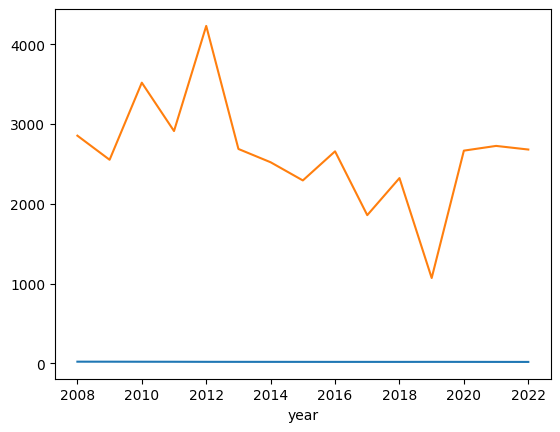

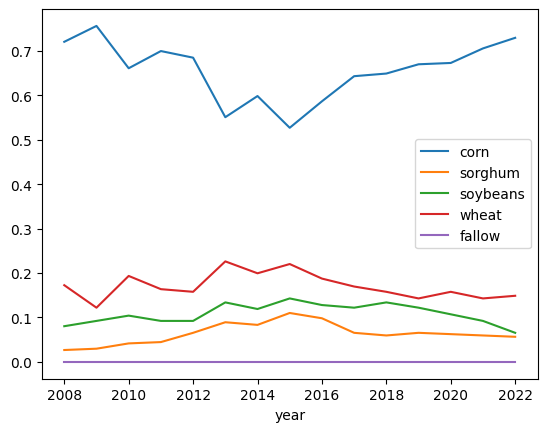

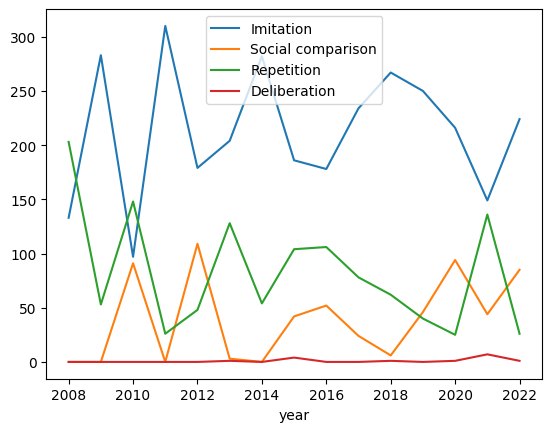

In [8]:
df_sys["GW_st"].plot()
df_sys["withdrawal"].plot()
df_sys[["corn", "sorghum", "soybeans", "wheat", "fallow"]].plot()
df_sys[["Imitation", "Social comparison", "Repetition", "Deliberation"]].plot()

### 8. (Optional) Read the metrices (Root Mean Square Error, Kling-Gupta Efficiency, and Regression Coefficient) 
based on observed and simulated data for given targets: groundwater saturated thickness, withdrawal, ratio of rainfed or irrigated fields, and ratio of crop types grown.

In [15]:
metrices = m.get_metrices(df_sys, data)
metrices

,r,rmse,kge
GW_st,0.974890,0.312925,0.901786
withdrawal,0.885169,339.951051,0.860616
rainfed,-0.239029,0.029044,-0.384324
corn,0.688415,0.052198,0.687738
sorghum,0.787474,0.024765,0.544020
soybeans,-0.130619,0.051452,-0.242748
wheat,0.482182,0.049573,0.396028
fallow,0.000000,0.087644,-0.732051
